<a href="https://colab.research.google.com/github/AhmedHamadaIT/Car_price_machine/blob/main/car_prices.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#import library

In [45]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn import metrics

data collection and processing

In [46]:
#load datasets
car_dataset= pd.read_csv('/content/car data.csv')

In [47]:
print(car_dataset)

    Car_Name  Year  Selling_Price  Present_Price  Kms_Driven Fuel_Type  \
0       ritz  2014           3.35           5.59       27000    Petrol   
1        sx4  2013           4.75           9.54       43000    Diesel   
2       ciaz  2017           7.25           9.85        6900    Petrol   
3    wagon r  2011           2.85           4.15        5200    Petrol   
4      swift  2014           4.60           6.87       42450    Diesel   
..       ...   ...            ...            ...         ...       ...   
296     city  2016           9.50          11.60       33988    Diesel   
297     brio  2015           4.00           5.90       60000    Petrol   
298     city  2009           3.35          11.00       87934    Petrol   
299     city  2017          11.50          12.50        9000    Diesel   
300     brio  2016           5.30           5.90        5464    Petrol   

    Seller_Type Transmission  Owner  
0        Dealer       Manual      0  
1        Dealer       Manual      0

In [48]:
#num of row and col
car_dataset.shape

(301, 9)

In [49]:
#missing value
car_dataset.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

In [50]:
#category of car
print(car_dataset.Seller_Type.value_counts())
print(car_dataset.Transmission.value_counts())
print(car_dataset.Fuel_Type.value_counts())


Dealer        195
Individual    106
Name: Seller_Type, dtype: int64
Manual       261
Automatic     40
Name: Transmission, dtype: int64
Petrol    239
Diesel     60
CNG         2
Name: Fuel_Type, dtype: int64


encoding category of data

In [51]:
# encoding "Fuel_Type" and "Seller_Type" and Transmission Column

car_dataset.replace({'Fuel_Type':{'Petrol':0,'Diesel':1,'CNG':2}},inplace=True)

car_dataset.replace({'Seller_Type':{'Dealer':0,'Individual':1}},inplace=True)

car_dataset.replace({'Transmission':{'Manual':0,'Automatic':1}},inplace=True)

In [52]:
car_dataset.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,0,0,0,0
1,sx4,2013,4.75,9.54,43000,1,0,0,0
2,ciaz,2017,7.25,9.85,6900,0,0,0,0
3,wagon r,2011,2.85,4.15,5200,0,0,0,0
4,swift,2014,4.60,6.87,42450,1,0,0,0


In [53]:
car_dataset.loc[car_dataset['Fuel_Type'] == 'CNG', 'Fuel_Type'] = 2


split data and traget

In [54]:
x = car_dataset.drop(['Car_Name','Selling_Price'],axis=1)
y = car_dataset['Selling_Price']

In [55]:
print(x)

print(y)

     Year  Present_Price  Kms_Driven  Fuel_Type  Seller_Type  Transmission  \
0    2014           5.59       27000          0            0             0   
1    2013           9.54       43000          1            0             0   
2    2017           9.85        6900          0            0             0   
3    2011           4.15        5200          0            0             0   
4    2014           6.87       42450          1            0             0   
..    ...            ...         ...        ...          ...           ...   
296  2016          11.60       33988          1            0             0   
297  2015           5.90       60000          0            0             0   
298  2009          11.00       87934          0            0             0   
299  2017          12.50        9000          1            0             0   
300  2016           5.90        5464          0            0             0   

     Owner  
0        0  
1        0  
2        0  
3        0 

split data into **train** and **test**

In [56]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.1,random_state=2)


**Training**

1. Linear Regression

In [57]:
lin_reg_model = LinearRegression()

In [58]:
lin_reg_model.fit(x_train, y_train)


LinearRegression()

model Evalution

In [59]:
training_data_pre = lin_reg_model.predict(x_train)

In [60]:
#R squared matrix

error_score = metrics.r2_score(y_train,training_data_pre)
print('R square error :'  ,error_score )

R square error : 0.8799451660493711


Visual the actual price and pesdicte

Text(0.5, 1.0, 'Actual Price VS Predicte Price')

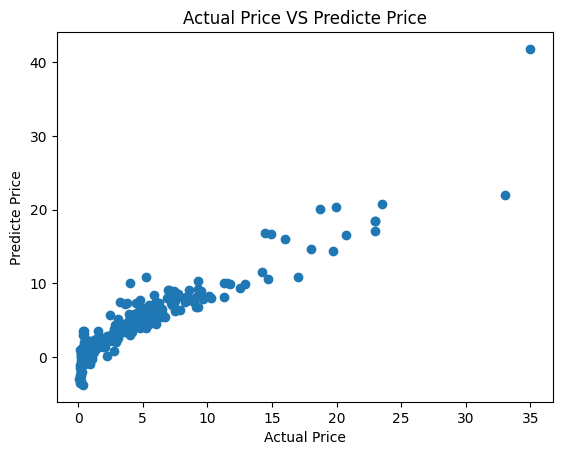

In [61]:
plt.scatter(y_train,training_data_pre)
plt.xlabel("Actual Price")
plt.ylabel("Predicte Price")
plt.title("Actual Price VS Predicte Price")

In [62]:

test_data_pre = lin_reg_model.predict(x_test)

In [63]:
#R squared matrix

error_score = metrics.r2_score(y_test,test_data_pre)
print('R square error :'  ,error_score )

R square error : 0.8365766715027051


Visual the actual price and pesdicte

Text(0.5, 1.0, 'Actual Price VS Predicte Price')

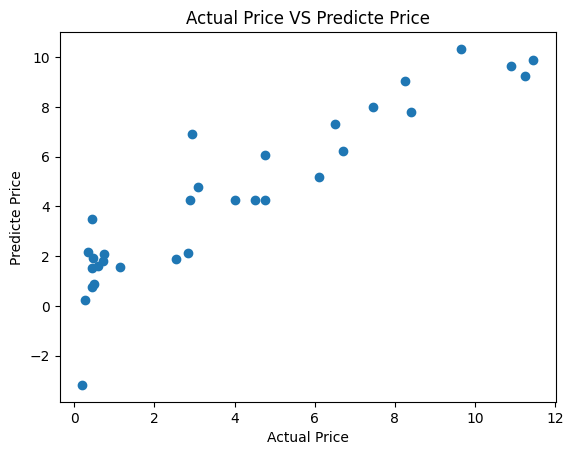

In [64]:
plt.scatter(y_test,test_data_pre)
plt.xlabel("Actual Price")
plt.ylabel("Predicte Price")
plt.title("Actual Price VS Predicte Price")

Lasso regression

In [65]:
lasso_reg_model = Lasso()

In [66]:
lasso_reg_model.fit(x_train,y_train)

Lasso()

Model evaluation

In [67]:
test_data_pre = lasso_reg_model.predict(x_test)

In [68]:
#R squared matrix

error_score = metrics.r2_score(y_test,test_data_pre)
print('R square error :'  ,error_score )

R square error : 0.8709167941173195


Visual the actual price and pesdicte

Text(0.5, 1.0, 'Actual Price VS Predicte Price')

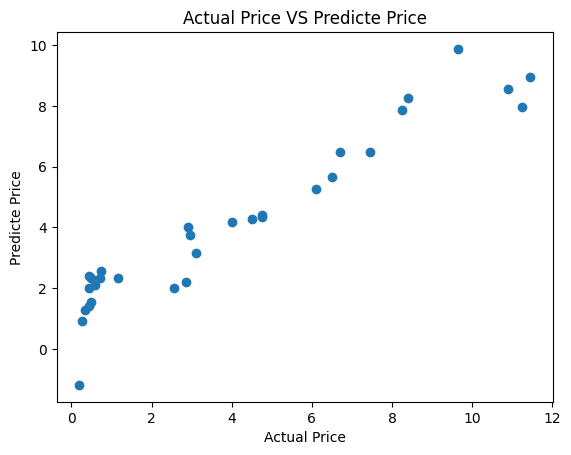

In [69]:
plt.scatter(y_test,test_data_pre)
plt.xlabel("Actual Price")
plt.ylabel("Predicte Price")
plt.title("Actual Price VS Predicte Price")